# Image Classification using Convolutional Neural Networks

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

### Importing the Dataset

In [2]:
data = tf.keras.utils.image_dataset_from_directory('columbiaImages-cnn', batch_size=32, image_size=(256, 256), shuffle=True)

Found 800 files belonging to 2 classes.


### Normalizing the Dataset

In [3]:
data = data.map(lambda x, y: (x / 255, y))

In [4]:
# check the range of the values
batch = data.as_numpy_iterator().next()
print(f'Minimum Value: {batch[0].min()}, Maximum Value: {batch[0].max()}')

Minimum Value: 0.0, Maximum Value: 1.0


### Partitioning the Dataset

In [5]:
# partition data by batches of 32 images
num_batches = len(data)
training_size = int(num_batches * 0.68)
validation_size = int(num_batches * 0.12)
testing_size = int(num_batches * 0.20)

training_set = data.take(training_size)
validation_set = data.skip(training_size).take(validation_size)
testing_set = data.skip(training_size + validation_size).take(testing_size)

### Building the Convolutional Neural Network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [7]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,528,417 (120.27 MB)

 Trainable params: 31,528,417 (120.27 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [10]:
history = model.fit(training_set, epochs=20, validation_data=validation_set)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.5265 - loss: 3.6998 - val_accuracy: 0.5625 - val_loss: 0.7325
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.6233 - loss: 0.7076 - val_accuracy: 0.6250 - val_loss: 0.5223
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.7547 - loss: 0.5162 - val_accuracy: 0.7188 - val_loss: 0.4660
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.8235 - loss: 0.4220 - val_accuracy: 0.6875 - val_loss: 0.5271
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.8320 - loss: 0.3989 - val_accuracy: 0.8333 - val_loss: 0.4132
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.7887 - loss: 0.4567 - val_accuracy: 0.7292 - val_loss: 0.4244
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.8259 - loss: 0.3684 - val_accuracy: 0.7812 - val_loss: 0.3935
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.8653 - loss: 0.2936 - val_accuracy: 0.

### Plotting the Accuracy

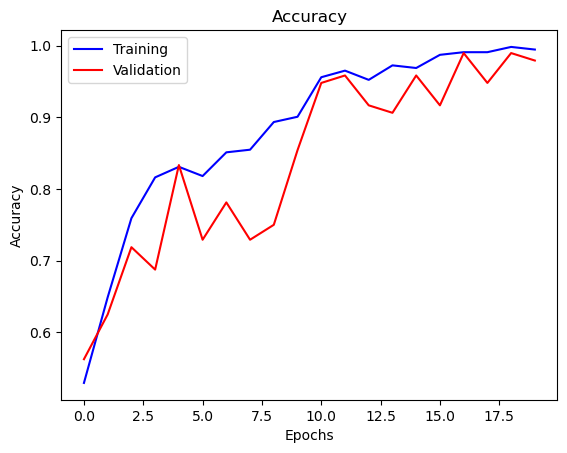

In [11]:
plt.plot(history.history['accuracy'], color='blue', label='Training')
plt.plot(history.history['val_accuracy'], color='red', label='Validation')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.show()

### Sensitivity, Specificity and Accuracy

In [12]:
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives, BinaryAccuracy

In [13]:
true_positives = TruePositives()
true_negatives = TrueNegatives()
false_positives = FalsePositives()
false_negatives = FalseNegatives()
binary_accuracy = BinaryAccuracy()

In [14]:
for batch in testing_set.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    true_positives.update_state(y, yhat)
    true_negatives.update_state(y, yhat)
    false_positives.update_state(y, yhat)
    false_negatives.update_state(y, yhat)
    binary_accuracy.update_state(y, yhat)

In [15]:
sensitivity = true_positives.result() / (true_positives.result() + false_negatives.result())
specificity = true_negatives.result() / (true_negatives.result() + false_positives.result())

print(f'Sensitivity: {sensitivity}, Specificity: {specificity}, Accuracy: {binary_accuracy.result()}')

Sensitivity: 0.9830508232116699, Specificity: 0.9900990128517151, Accuracy: 0.987500011920929
